In [174]:
import pandas as pd 

df = pd.read_json('data\data_ebay.json', lines=True)

In [175]:
def print_nans_perc(df, Print = False, perc = 0.95):
    n = len(df)
    nans_perc = df.isna().sum() / len(df)
    cols = nans_perc[nans_perc > 0.95].index
    print('len - ', n)
    nans_perc.sort_values(ascending=True, inplace=True)
    if Print:
        for index, val in zip(nans_perc.index, nans_perc):
            print(index + ': ', val)
    return cols
print_nans_perc(df, Print = True)

len -  8070
Title:  0.0
Price:  0.0
Product URL:  0.0
ID:  0.0
Photo URL:  0.0
Condition:  0.0
Seller notes:  0.0
Brand:  0.04014869888475837
Frame Size:  0.2550185873605948
Wheel Size:  0.3206939281288724
Bike Type:  0.4038413878562577
Vintage:  0.4070631970260223
Brake Type:  0.48104089219330853
Model:  0.5257744733581164
Type:  0.5406443618339529
Handlebar Type:  0.6064436183395291
Department:  0.6228004956629491
Frame Material:  0.6387856257744734
Number of Speeds:  0.6417596034696407
Color:  0.6745972738537794
MPN:  0.7004956629491945
Configuration:  0.7078066914498141
Material:  0.7104089219330855
Colour:  0.7218091697645601
Model Year:  0.7478314745972738
Suspension:  0.7739776951672862
Suspension Type:  0.7838909541511772
Gear Change Mechanism:  0.7850061957868649
UPC:  0.7892193308550186
Gender:  0.8200743494423792
Number of Gears:  0.8229244114002479
Shifter Style:  0.8377942998760842
Features:  0.8465923172242875
Country/Region of Manufacture:  0.8728624535315985
Tyre Type: 

Index(['Shifter', 'Tires', 'Non-Domestic Product', 'Weight', 'Frame Number',
       'Frame and Wheel rating', 'Item Weight', 'Bundle Listing',
       'Front Derailleur', 'Shifters',
       ...
       'Rear Shock', 'Casette', 'Modell', 'Produktart', 'Radtyp', 'Customised',
       'Scooter Type', 'Suitable For', 'Batterys', 'Marca'],
      dtype='object', length=370)

In [176]:
def drop_nans_in_cols(df : pd.DataFrame, cols : list):
    print(len(df))
    df.dropna(subset=cols, inplace=True)
    df.dropna(axis = 1, how = 'all', inplace=True)
    print(len(df))
    print_nans_perc(df)

In [177]:
df['type'] = df['Bike Type'].combine_first(df['Type'])
df.drop(['Bike Type', 'Type'], axis = 1, inplace=True)
print('perc of left nans: ', df['type'].isna().sum() / len(df))

perc of left nans:  0.06394052044609666


<Axes: ylabel='Frequency'>

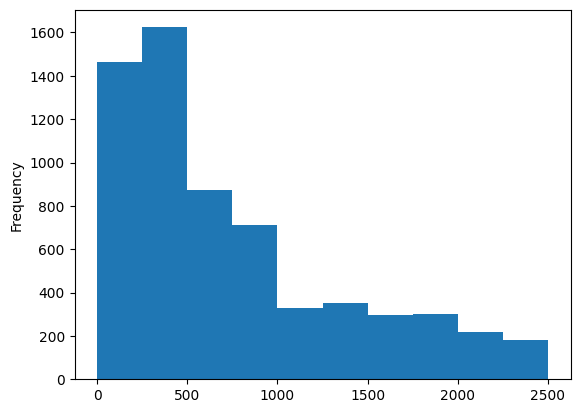

In [178]:
df['Price'].replace('[A-Za-z, \$, £]','',inplace=True, regex=True)
df = df[df['Price'] != '']
df['Price'] = df['Price'].astype(float)
df[df['Price'] < 2500]['Price'].plot(kind='hist')

In [179]:
bike_groups = [
    "Dura Ace", "Dura-Ace", "Ultegra", "105", "Tiagra", "Sora", "Claris", "GRX",
    
    "XTR", "Deore XT", "SLX", "Deore", "Alivio", "Acera", "Altus", "Tourney", "Zee", "Saint",
    
    "Super Record", "Record", "Chorus", "Potenza", "Centaur", "Veloce", "Athena",
    
    "Sram Red", "Force", "Rival", "Apex",

    "XX1", "X01","GX", "NX", "SX", "XX", "X0", "X9", "X7", "X5", "Descendant", "Code"
]

road_groups = [ "dura ace", "dura-ace", "ultegra", "105", "tiagra", "sora", "claris", "grx",
               "super record", "record", "chorus", "potenza", "centaur", "veloce", "athena",
                "sram red", "Force", "arval", "apex"]

mtb_groups = [
    "xtr", "deore xt", "slx", "deore", "alivio", "acera", "altus", "tourney", "zee", "saint",
    "xx1", "x01", "gx", "nx", "sx", "xx", "x0", "x9", "x7", "x5", "descendant", "code"
]

bike_groups_dict_lower = {
    "dura ace": 1.0, "dura-ace": 1.0, "ultegra": 0.9, "105": 0.8, "tiagra": 0.7, "sora": 0.6, "claris": 0.5, "grx": 0.8,
    
    "xtr": 1.0, "deore xt": 0.9, "slx": 0.8, "deore": 0.7, "alivio": 0.6, "acera": 0.5, "altus": 0.4, "tourney": 0.3, "zee": 0.8, "saint": 0.9,
    
    "super record": 1.0, "record": 0.9, "chorus": 0.8, "potenza": 0.7, "centaur": 0.6, "veloce": 0.5, "athena": 0.4,
    
    "sram red": 1.0, "force": 0.9, "rival": 0.8, "apex": 0.7,
    
    "xx1": 1.0, "x01": 0.9, "gx": 0.8, "nx": 0.7, "sx": 0.6, "xx": 0.9, "x0": 0.8, "x9": 0.7, "x7": 0.6, "x5": 0.5, "descendant": 0.7, "code": 0.7
}


df.drop(['Color', 'Colour', 'Product URL', 'Photo URL'], axis=1, inplace=True)

In [180]:
import re
import numpy as np

def find_from_list(row, columns, list):
    for col in columns:
        value = row[col]
        found = ''
        if pd.notna(value) and isinstance(value, str): 
            found = re.findall(r'(' + '|'.join(list) + ')', value, re.IGNORECASE)
        if found:
            return str(found[0]).lower()
    return np.nan

cols = ['Title', 'Seller notes', 'Model', 'Brake Type']
#cols = df.columns
df['groupset'] = np.nan
df['groupset'] = df.apply(find_from_list, axis=1, args = (cols, bike_groups))
print('perc of left nans: ', df['groupset'].isna().sum() / len(df))
df['groupset_num'] = df['groupset'].replace(bike_groups_dict_lower, regex=True)
df['groupset_num'] = df['groupset_num'].astype(float)

perc of left nans:  0.7587360594795539


In [181]:
df['speeds'] = df['Number of Speeds'].combine_first(df['Number of Gears'])
df['speeds_num'] = df['speeds'].str.extract(r'\b(\d{1,2})\b').astype(float)

def re_count_gears(x):
    if x < 5 or x > 33:
        return np.nan
    elif x <= 12:
        return x
    else:
        if x % 2 == 0:
            if x/2 > 12:
                return np.nan
            else:
                return x/2
        elif x % 3 == 0:
            return x/3

speeds_dict = {5: 0.2, 6: 0.3, 7: 0.4, 8: 0.5, 9: 0.6, 10: 0.7, 11: 0.8, 12: 0.9}

df['speeds_num'] = df['speeds_num'].apply(re_count_gears)
df['speeds_num'].replace(speeds_dict, regex=True, inplace=True)
print('perc of left nans: ', df['groupset_num'].isna().sum() / len(df))
df['groupset_num'] = df['groupset_num'].combine_first(df['speeds_num']) 
print('perc of left nans: ', df['groupset_num'].isna().sum() / len(df))

perc of left nans:  0.7587360594795539
perc of left nans:  0.41734820322180916


In [182]:
materials = ['carbon', 'alu', 'aluminium', 'steel', 'alloy', 'titanium', 'chromoly']
materials_dict = {'carbon': 0.9, 'alu': 0.5, 'aluminium': 0.5, 'steel': 0.3, 'alloy': 0.5, 'titanium': 0.6, 'chromoly': 0.15}

cols = df.columns
df['material'] = np.nan
df['material'] = df.apply(find_from_list, axis=1, args = (cols, materials,))
print('perc of left nans: ', df['material'].isna().sum() / len(df))
df['material_num'] = df['material'].replace(materials_dict, regex=True)
df['material_num'] = df['material_num'].astype(float)
df.groupby('material').size().sort_values()

perc of left nans:  0.3226765799256506


material
chromoly      40
titanium     138
alloy        256
steel        676
alu         1617
carbon      2739
dtype: int64

In [183]:
e_shift = ['di2', 'axs', 'etap']
e_shift_dict = {'di2': 1, 'axs': 1, 'etap': 1, np.nan: 0}

df['e_shift_type'] = np.nan 
cols = df.columns
df['e_shift_type'] = df.apply(find_from_list, axis=1, args=(cols, e_shift,))
print('perc of left nans: ', df['e_shift_type'].isna().sum() / len(df))
df['e_shift_num'] = df['e_shift_type'].replace(e_shift_dict, regex=True)
df['e_shift_num'] = df['e_shift_num'].astype(float)
df.groupby('e_shift_num').size().sort_values()

perc of left nans:  0.9431226765799257


e_shift_num
1.0     459
0.0    7611
dtype: int64

In [184]:
df = df[df['Condition'] != 'For parts or not working']
condition_dict = {'Used': 0, 'New': 1, 'New other (see details)': 1, 'Seller refurbished': 0, 'Manufacturer refurbished': 0, '--': 0}

df['isNew'] = df['Condition'].replace(condition_dict, regex=True)
df['isNew'] = df['isNew'].astype(float)
print('perc of left nans: ', df['isNew'].isna().sum() / len(df))
df.groupby('isNew').size().sort_values()

perc of left nans:  0.0


isNew
1.0    2077
0.0    5958
dtype: int64

In [185]:
df.drop(['MPN'], axis=1, inplace=True)

In [186]:
def find_year(row, cols):
    for col in cols:
        value = row[col]
        if pd.notna(value) and isinstance(value, str):
            four_num = re.findall(r'\b[0-9]{4}\b', value)
            four_num = [float(num) for num in four_num]
            for num in four_num:
                if 1950 <= num <= 2024:
                    return num
    return np.nan

df['Production_year'] = np.nan
cols = ['Model Year','Title'] 
#cols = df.columns
df['Production_year'] = df.apply(find_year, axis=1, args=(cols,))
print('perc of left nans: ', df['Production_year'].isna().sum() / len(df))
'''#print(df[df['groupset'] == 'deore xt'][['Title', 'Production_year']])
df[df['Production_year'] < 2000].groupby('groupset').size()
df.groupby('groupset').size().sort_values()
df.groupby('groupset')['Production_year'].median()[df.groupby('groupset')['Production_year'].median() < 2010]
'''

perc of left nans:  0.6644679527069073


"#print(df[df['groupset'] == 'deore xt'][['Title', 'Production_year']])\ndf[df['Production_year'] < 2000].groupby('groupset').size()\ndf.groupby('groupset').size().sort_values()\ndf.groupby('groupset')['Production_year'].median()[df.groupby('groupset')['Production_year'].median() < 2010]\n"

In [187]:
brakes = ['rim', 'disc', 'v-brake', 'hydraulic', 'caliper', 'cantilever', 'v-brakes']
brakes_dict = {'rim': 0.5, 'disc': 1, 'v-brake': 0.5, 'hydraulic': 1, 'caliper': 0.5, 'cantilever': 0.5, 'v-brakes': 0.5}

df['brake_type'] = np.nan 
cols = df.columns
df['brake_type'] = df.apply(find_from_list, axis=1, args=(cols, brakes,))
print('perc of left nans: ', df['brake_type'].isna().sum() / len(df))
df['brake_num'] = df['brake_type'].replace(brakes_dict, regex=True)
df['brake_num'] = df['brake_num'].astype(float)
df.groupby('brake_num').size().sort_values()

perc of left nans:  0.466210329807094


brake_num
0.5    2060
1.0    2229
dtype: int64

groupset
105         2016.5
dura ace    2017.0
sram red    2017.5
ultegra     2018.0
xtr         2015.5
Name: Production_year, dtype: float64

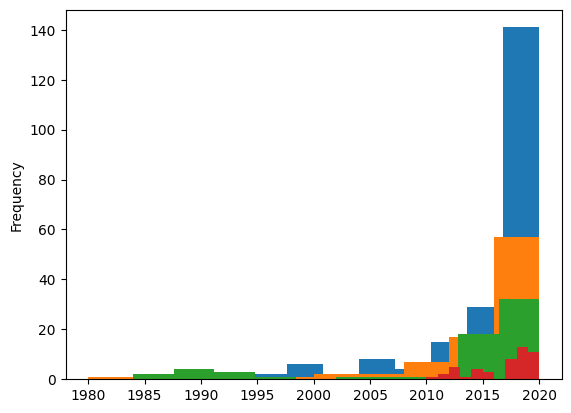

In [188]:
df[df['groupset'] == 'ultegra']['Production_year'].plot(kind='hist')
df[df['groupset'] == '105']['Production_year'].plot(kind='hist')
df[df['groupset'] == 'dura ace']['Production_year'].plot(kind='hist')
df[df['groupset'] == 'sram red']['Production_year'].plot(kind='hist')
df.groupby('groupset')['Production_year'].median()[df.groupby('groupset').size() > 100]

In [189]:
print('perc od left nans: ', df['Production_year'].isna().sum() / len(df))
df.loc[df['groupset'] == '105', 'Production_year'] = df[df['groupset'] == '105']['Production_year'].fillna(2017)
df.loc[df['groupset'] == 'ultegra', 'Production_year'] = df[df['groupset'] == 'ultegra']['Production_year'].fillna(2018)
df.loc[df['groupset'] == 'dura ace', 'Production_year'] = df[df['groupset'] == 'dura ace']['Production_year'].fillna(2017)
df.loc[df['groupset'] == 'sram red', 'Production_year'] = df[df['groupset'] == 'sram red']['Production_year'].fillna(2018)
print('perc od left nans: ', df['Production_year'].isna().sum() / len(df))

perc od left nans:  0.6644679527069073
perc od left nans:  0.585687616677038


In [190]:
print('perc od left nans: ', df['type'].isna().sum() / len(df))
df.loc[df['groupset'].isin(road_groups) & df['type'].isna(), 'type'] = 'Road Bike'
df.loc[df['groupset'].isin(mtb_groups) & df['type'].isna(), 'type'] = 'mtb'
print('perc od left nans: ', df['type'].isna().sum() / len(df))


perc od left nans:  0.0640945861854387
perc od left nans:  0.03920348475420037


<Axes: ylabel='Frequency'>

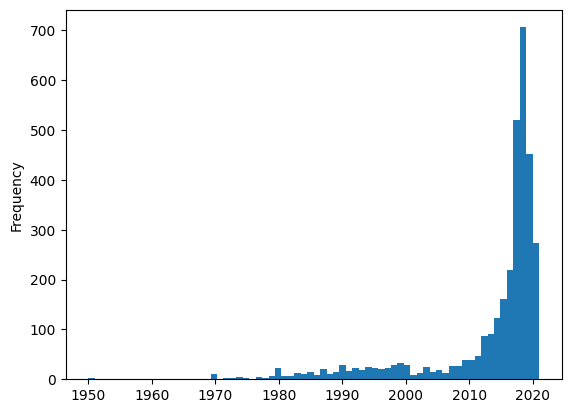

In [191]:
df['Production_year'].plot(kind='hist', bins = 70)

perc od left nans:  0.585687616677038
perc od left nans:  0.45737398879900437


<Axes: ylabel='Frequency'>

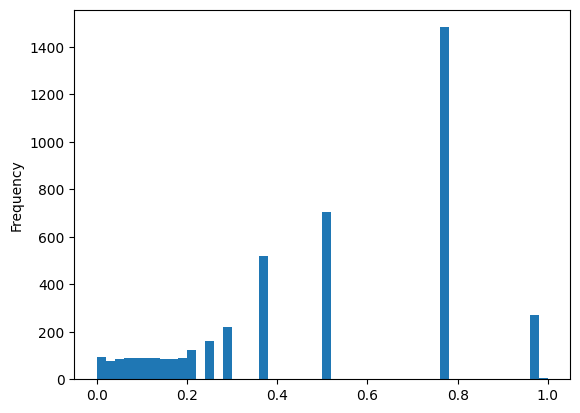

In [192]:
print('perc od left nans: ', df['Production_year'].isna().sum() / len(df))
indexes = df['Condition'].isin(['New', 'New other (see details)'])
df.loc[indexes, 'Production_year'] = df.loc[indexes, 'Production_year'].fillna(2019) # 2019 - median of new bikes
print('perc od left nans: ', df['Production_year'].isna().sum() / len(df))


min = 1950
max = df['Production_year'].max()
df['year_num'] = df['Production_year'].apply(lambda x: (x - min + 0.1)/(max - min))

from sklearn.preprocessing import QuantileTransformer

notna_idx = df.index[df['Production_year'].notna()]
arr = df.loc[notna_idx, 'Production_year'].to_numpy()
arr = arr.reshape(-1, 1)
qt = QuantileTransformer(n_quantiles=len(arr), output_distribution='uniform')
arr = qt.fit_transform(arr)
arr = arr.flatten()
df.loc[notna_idx,'year_num'] = arr
 
df['year_num'].plot(kind='hist', bins=50)



In [193]:
cols = print_nans_perc(df)
to_drop = ['Frame Size', 'Department', 'UPC', 'Gender', 'Shifter Style', 
              'Features', 'Country/Region of Manufacture', 'Tyre Type', 'Style', 'Manufacturer Color', 'Tire Type',
              'Modified Item', 'Tires', 'Custom-Built', 'Custom Bundle', 'Handlebar Type', 'Shifter', 'Gear Change Mechanism', 'e_shift_type', 
              'Model Year', 'Configuration', 'Frame Material', 'Brake Type', 'Condition', 'Number of Gears', 'speeds', 'Number of Speeds', 'Material', 'speeds_num', 'Vintage', 'Model', 'Brand']
to_drop += list(cols)

df_drp = df.drop(to_drop, axis = 1, inplace=False)
print_nans_perc(df_drp, Print=True)

len -  8035
len -  8035
Title:  0.0
Price:  0.0
ID:  0.0
Seller notes:  0.0
isNew:  0.0
e_shift_num:  0.0
type:  0.03920348475420037
Wheel Size:  0.319477286869944
material:  0.322090852520224
material_num:  0.322090852520224
groupset_num:  0.4165525824517735
Production_year:  0.45737398879900437
year_num:  0.45737398879900437
brake_type:  0.466210329807094
brake_num:  0.466210329807094
groupset:  0.7586807716241444
Suspension:  0.7739887990043559
Suspension Type:  0.7834474175482266


Index([], dtype='object')

In [194]:
roadies = df_drp[df_drp['type'].isin(['Road Bike', 'Road Bike - Racing', 'Road bike', 'Road Bike - Touring', 
                              'Road', 'Cyclocross Bike', 'cyclocross/gravel', 'ROAD DISC BIKE', 'Road Bike - Racing or Touring', 
                              'Aero Road Bike', 'Racing/Touring Roadbike', 'Road/Touring', 'Time Trial/Triathlon Bike', 
                              'Road Bike Racing', 'Time Trial/Triathlon', 'Road/Racing', 'Racing/road bike', 
                              'Raod Bike', 'Road Racing Bike', 'road bike', 'Road Bike - Touring ??', 
                              'Road Bike / triathlon', 'Racing/Road Bike', 'Comfort Road Bike',  
                              'road Bike', 'Road Bike / Racing Bike', 'Hybrid', 
                              'Gravel, CX, Road, Commuter', 'Road Bike / Cyclocross Bike / Triathlon', 'Race Road Bike',
])]

cols_to_drop_road = ['Wheel Size', 'Suspension', 'Suspension Type', 'Seller notes']
roadies.drop(columns=cols_to_drop_road, inplace=True)

roadies['type'] = 'Road Bike'

C:\Users\Szymon\AppData\Local\Temp\ipykernel_12668\2161812531.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roadies.drop(columns=cols_to_drop_road, inplace=True)
C:\Users\Szymon\AppData\Local\Temp\ipykernel_12668\2161812531.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roadies['type'] = 'Road Bike'


In [195]:
old_idx = roadies.loc[roadies['Production_year'] < 2015].index
roadies.loc[old_idx, 'brake_num'] = 0.5

In [196]:
roadies_num = roadies.drop(columns=['groupset', 'brake_type', 'material', 'type', 'Production_year'])
print_nans_perc(roadies_num, Print=True)
print_nans_perc(roadies_num.dropna(axis=0, how='any'), Print=True)

len -  4088
Title:  0.0
Price:  0.0
ID:  0.0
e_shift_num:  0.0
isNew:  0.0
material_num:  0.25489236790606656
groupset_num:  0.35200587084148727
year_num:  0.41707436399217224
brake_num:  0.42000978473581213
len -  1356
Title:  0.0
Price:  0.0
ID:  0.0
groupset_num:  0.0
material_num:  0.0
e_shift_num:  0.0
isNew:  0.0
brake_num:  0.0
year_num:  0.0


Index([], dtype='object')

In [197]:
roadies_num

,Title,Price,ID,groupset_num,material_num,e_shift_num,isNew,brake_num,year_num
0,2018 Giant Defy Advanced 3 Road Bike - Sm - Re...,1399.99,0,0.8,NaN,0.0,0.0,1.0,0.516403
1,Carbon Italian road bike Guerciotti DX50 Ultegra,2995.00,2,0.5,0.9,0.0,0.0,NaN,NaN
2,Cervelo Soloist 56cm Road Bike Shimano Ultegra...,1049.00,3,0.9,NaN,0.0,0.0,NaN,0.516403
3,Cervelo Soloist Road Race Bike 54 cm Shimano U...,929.35,4,0.9,0.5,0.0,0.0,0.5,0.516403
5,2019 Pinarello Prince Ui2 Road Bike - Reg. $5200,2999.99,6,0.8,0.9,1.0,1.0,NaN,0.767378
...,...,...,...,...,...,...,...,...,...
8058,Carrera Virtuoso Flat Handle Bar Road Bike. 51 cm,290.00,8993,NaN,NaN,0.0,0.0,NaN,NaN
8062,Cervelo P2 Carbon Time Trial / Triathlon Bike ...,1600.00,8998,NaN,0.9,0.0,0.0,0.5,NaN
8065,Vintage Raleigh Ladies Bike + basket,64.00,9001,NaN,0.3,0.0,0.0,0.5,0.013076
8067,kuota KOM EVO carbon road bike,460.00,9004,NaN,0.9,0.0,0.0,NaN,NaN


In [198]:
mtb = df_drp[df_drp['type'].isin(['Mountain Bike', 'Full Suspension', 'Downhill Bike', 'MOUNTAIN BIKE', 'Mountain Bike/ Gravel', 
                          'Mountain Bike MTB 29ER', 'Mountain Suspension Bike', 'Hardtail Bike','Mountain bike', 'mountain  bike style', 
                          'Hardtail Mountain Bike', 'MOUNTAIN', 'mountain bike', 'Mountain Bike19"', 'Enduro', '29er Mountain Bike', 'Mountain / JUMP Bike',  
])]

mtb['type'] = 'MTB'

print_nans_perc(mtb, Print=True)

len -  3381
Title:  0.0
Price:  0.0
ID:  0.0
Seller notes:  0.0
type:  0.0
e_shift_num:  0.0
isNew:  0.0
Wheel Size:  0.215025140490979
material:  0.419698314108252
material_num:  0.419698314108252
brake_type:  0.4504584442472641
brake_num:  0.4504584442472641
groupset_num:  0.46850044365572313
Production_year:  0.5430346051464063
year_num:  0.5430346051464063
Suspension Type:  0.65276545400769
Suspension:  0.7296657793552204
groupset:  0.904170363797693


C:\Users\Szymon\AppData\Local\Temp\ipykernel_12668\3495542643.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtb['type'] = 'MTB'


Index([], dtype='object')

In [199]:
wheel_size = ['26', '27.5', '27', '27.5', '29']
wheel_size_dict = {'27.5': 0.66, '29': 1, '27': 0.66, '27,5': 0.66, '26': 0.33}

cols = ['Wheel Size']
mtb['Wheel Size'] = mtb.apply(find_from_list, axis=1 ,args=(cols, wheel_size, ))
mtb['wheel_num'] = mtb['Wheel Size'].replace(wheel_size_dict, regex=True)
print_nans_perc(mtb, Print=True)

len -  3381
Title:  0.0
isNew:  0.0
e_shift_num:  0.0
type:  0.0
ID:  0.0
Price:  0.0
Seller notes:  0.0
Wheel Size:  0.2836438923395445
wheel_num:  0.2836438923395445
material:  0.419698314108252
material_num:  0.419698314108252
brake_type:  0.4504584442472641
brake_num:  0.4504584442472641
groupset_num:  0.46850044365572313
year_num:  0.5430346051464063
Production_year:  0.5430346051464063
Suspension Type:  0.65276545400769
Suspension:  0.7296657793552204
groupset:  0.904170363797693


C:\Users\Szymon\AppData\Local\Temp\ipykernel_12668\2658688341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtb['Wheel Size'] = mtb.apply(find_from_list, axis=1 ,args=(cols, wheel_size, ))
C:\Users\Szymon\AppData\Local\Temp\ipykernel_12668\2658688341.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtb['wheel_num'] = mtb['Wheel Size'].replace(wheel_size_dict, regex=True)


Index([], dtype='object')

In [200]:
mtb['suspension'] = mtb['Suspension'].combine_first(mtb['Suspension Type'])
mtb.drop(columns=['Suspension', 'Suspension Type'], inplace=True)

C:\Users\Szymon\AppData\Local\Temp\ipykernel_12668\2762268023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtb['suspension'] = mtb['Suspension'].combine_first(mtb['Suspension Type'])
C:\Users\Szymon\AppData\Local\Temp\ipykernel_12668\2762268023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtb.drop(columns=['Suspension', 'Suspension Type'], inplace=True)


In [201]:
susps = ['front', 'full', 'no suspension', 'rear']
susps_dict = {'front': 0.5, 'full': 1, 'no': 0, 'rear': 1}

cols = mtb.columns
mtb['suspension'] = mtb.apply(find_from_list, axis=1 ,args=(cols, susps, ))
mtb['suspension_num'] = mtb['suspension'].replace(susps_dict, regex=True)
print_nans_perc(mtb, Print=True)

len -  3381
Title:  0.0
Price:  0.0
ID:  0.0
Seller notes:  0.0
isNew:  0.0
type:  0.0
e_shift_num:  0.0
Wheel Size:  0.2836438923395445
wheel_num:  0.2836438923395445
suspension_num:  0.3821354628808045
suspension:  0.3821354628808045
material:  0.419698314108252
material_num:  0.419698314108252
brake_type:  0.4504584442472641
brake_num:  0.4504584442472641
groupset_num:  0.46850044365572313
Production_year:  0.5430346051464063
year_num:  0.5430346051464063
groupset:  0.904170363797693


C:\Users\Szymon\AppData\Local\Temp\ipykernel_12668\770724865.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtb['suspension'] = mtb.apply(find_from_list, axis=1 ,args=(cols, susps, ))
C:\Users\Szymon\AppData\Local\Temp\ipykernel_12668\770724865.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtb['suspension_num'] = mtb['suspension'].replace(susps_dict, regex=True)


Index([], dtype='object')

In [202]:
old_idx = mtb.loc[mtb['Production_year'] > 2010].index
mtb.loc[old_idx, 'brake_num'] = 1

In [203]:
mtb_num = mtb.drop(columns=['groupset', 'brake_type', 'material', 'type', 'Production_year', 'Wheel Size', 'Seller notes'])
print_nans_perc(mtb_num, Print=True)
print_nans_perc(mtb_num.dropna(axis=0, how='any'))


len -  3381
Title:  0.0
Price:  0.0
ID:  0.0
e_shift_num:  0.0
isNew:  0.0
wheel_num:  0.2836438923395445
brake_num:  0.32712215320910976
suspension:  0.3821354628808045
suspension_num:  0.3821354628808045
material_num:  0.419698314108252
groupset_num:  0.46850044365572313
year_num:  0.5430346051464063
len -  660


Index([], dtype='object')

In [204]:
roadies_num.dropna(axis=0, how='any', inplace=True)
roadies_num.to_json('data\ebay_road.json', lines=True, orient='records')
roadies_num

,Title,Price,ID,groupset_num,material_num,e_shift_num,isNew,brake_num,year_num
3,Cervelo Soloist Road Race Bike 54 cm Shimano U...,929.35,4,0.9,0.5,0.0,0.0,0.5,0.516403
6,2019 Specialized Roubaix Udi2 54 - Roval C38 ...,3950.00,7,0.8,0.9,1.0,0.0,1.0,0.767378
9,Trek 2000 Alpha SL 60 cm Aluminum Road Bike 3 ...,469.85,10,0.6,0.5,0.0,0.0,0.5,0.096467
12,NEW 2019 Cannondale CAAD12 105 - 52 cm.\t,1199.00,13,0.8,0.5,0.0,1.0,0.5,0.767378
13,Cannondale CAAD 9 Road Bike SRAM Red 22 Quarq ...,910.00,14,1.0,0.5,0.0,0.0,0.5,0.516403
...,...,...,...,...,...,...,...,...,...
7994,"Basso Ascot Vintage Road Bike, 54cm, Columbus ...",999.99,8925,1.0,0.3,0.0,0.0,0.5,0.056894
7996,2013 Canyon Aeroad CF F10 Carbon Road Bike Siz...,999.99,8929,0.9,0.9,0.0,0.0,0.5,0.190181
8012,Cannondale Caad 12 Shimano 105 Men's/Boy's Roa...,700.00,8945,0.8,0.5,0.0,0.0,0.5,0.290892
8029,"Saracen Galibier Carbon Road Bike 56cm, Zipp 3...",700.00,8964,0.9,0.9,0.0,0.0,0.5,0.516403


In [206]:
mtb_num.dropna(axis=0, how='any', inplace=True)
mtb_num.to_json('data\ebay_mtb.json', lines=True, orient='records')
mtb_num

,Title,Price,ID,groupset_num,material_num,e_shift_num,isNew,brake_num,year_num,wheel_num,suspension,suspension_num
1310,2007 Giant TCR One Road Bike Excellent Conditi...,650.0,1396,0.4,0.3,0.0,0.0,0.5,0.123079,1.00,front,0.5
2283,"Fuji Finest 1.9 Disc Women's Road Bike 2018, E...",700.0,2636,0.4,0.3,0.0,1.0,1.0,0.516403,1.00,front,0.5
2470,2018 Specialized Stumpjumper ST Alloy 27.5 (LA...,1200.0,2842,0.9,0.5,0.0,1.0,1.0,0.767378,0.66,full,1.0
2475,"2018 Trek Marlin 6, Size 18.5"" Black, Hardtail...",595.0,2848,0.9,0.5,0.0,0.0,1.0,0.516403,1.00,front,0.5
2476,2002 Intense Haro Downhill Mountain Bike,500.0,2849,0.6,0.5,0.0,0.0,1.0,0.102891,0.33,full,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8027,Brand New Carrera valour 20 inch mountain bike...,400.0,8962,0.4,0.5,0.0,1.0,1.0,0.767378,0.66,front,0.5
8031,White XC Forme Sport Mountain,256.0,8966,0.4,0.5,0.0,1.0,1.0,0.767378,0.33,front,0.5
8032,MTB Storck full suspension carbon bike Adrenic...,2500.0,8967,1.0,0.9,0.0,1.0,1.0,0.767378,0.66,full,1.0
8050,"Boardman Comp Mountain Bike, MTB, 14"" Frame, N...",350.0,8985,0.6,0.5,0.0,0.0,1.0,0.169878,0.33,front,0.5
